In [1]:
import tensorflow as tf
import numpy as np

C:\Users\josep\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import linear_model

In [3]:
train = pd.read_csv('train.csv')

In [4]:
test=pd.read_csv('test.csv')

In [5]:
print(train.shape)

(1460, 81)


In [6]:
print(test.shape)

(1459, 80)


In [7]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
print(train.SalePrice.describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


skew is: 1.8828757597682129


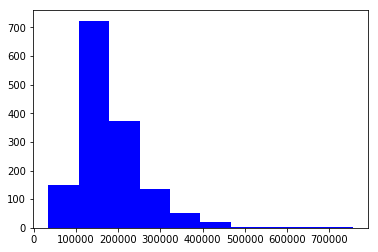

In [9]:
print("skew is:",train.SalePrice.skew())
plt.hist(train.SalePrice, color='blue')
plt.show()

skew is :  0.12133506220520406


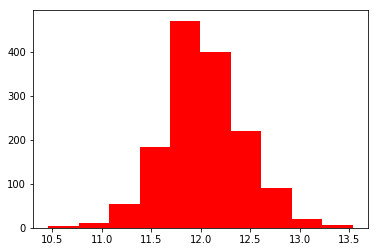

In [10]:
target = np.log(train.SalePrice)
print("skew is : ",target.skew())
plt.hist(target, color='red')
plt.show()

In [11]:
numeric_features = train.select_dtypes(include=[np.number])
corr = numeric_features.corr()

print(corr['SalePrice'].sort_values(ascending=False)[:5])
print(corr['SalePrice'].sort_values(ascending=False)[-5:])

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


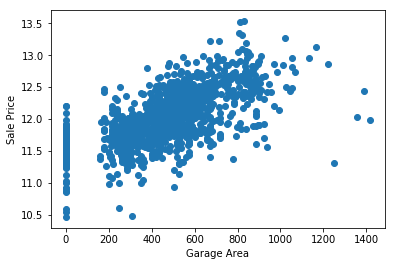

In [12]:
plt.scatter(x=train['GarageArea'], y=target)
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

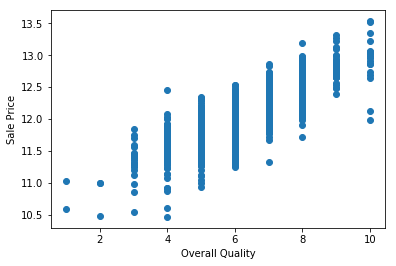

In [13]:
plt.scatter(x=train['OverallQual'], y=target)
plt.ylabel('Sale Price')
plt.xlabel('Overall Quality')
plt.show()

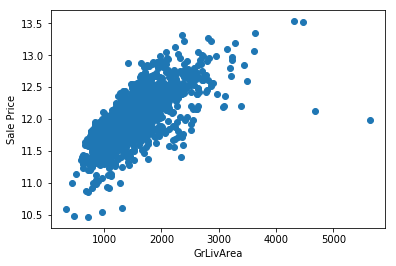

In [14]:
plt.scatter(x=train['GrLivArea'], y=target)
plt.ylabel('Sale Price')
plt.xlabel('GrLivArea')
plt.show()

In [15]:
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns =['Null Count']
nulls.index.name = 'Feature'

print(nulls)

              Null Count
Feature                 
PoolQC              1453
MiscFeature         1406
Alley               1369
Fence               1179
FireplaceQu          690
LotFrontage          259
GarageCond            81
GarageType            81
GarageYrBlt           81
GarageFinish          81
GarageQual            81
BsmtExposure          38
BsmtFinType2          38
BsmtFinType1          37
BsmtCond              37
BsmtQual              37
MasVnrArea             8
MasVnrType             8
Electrical             1
Utilities              0
YearRemodAdd           0
MSSubClass             0
Foundation             0
ExterCond              0
ExterQual              0


In [16]:
categoricals = train.select_dtypes(exclude=[np.number])
print(categoricals.describe())


       MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1      ...      GarageType  \
count       1460         1460       1460      ...            1379   
unique         3           25          9      ...               6   
top          Gtl        NAmes       Norm      ...          Attchd   
freq        1382          225       1260      ...             870   

       GarageFinish GarageQual GarageCond PavedDrive PoolQC  Fence  \
count          1379       1379       1379       1460      7    281   
unique            3          5          5          3      3      4   
top             Unf         TA         TA          Y     Gd  MnPrv   
freq    

In [17]:
print("Original")
print(train.Street.value_counts())

Original
Pave    1454
Grvl       6
Name: Street, dtype: int64


In [18]:
train['enc_street'] = pd.get_dummies(train.Street, drop_first=True)
test['enc_street'] = pd.get_dummies(train.Street, drop_first=True)

print('transformed')
print(train.enc_street.value_counts())

transformed
1    1454
0       6
Name: enc_street, dtype: int64


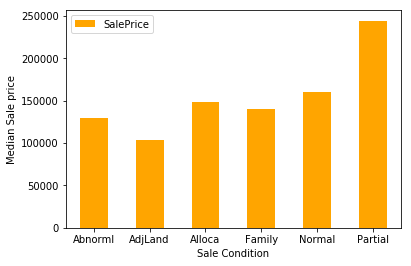

In [19]:
condition_pivot = train.pivot_table(index='SaleCondition',values='SalePrice',aggfunc=np.median)
condition_pivot.plot(kind='bar', color='orange')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale price')
plt.xticks(rotation=0)
plt.show()

In [20]:
def encode(x): 
    return 1 if x == 'Partial' else 0
train['enc_condition'] = train.SaleCondition.apply(encode)
test['enc_condition'] = test.SaleCondition.apply(encode)

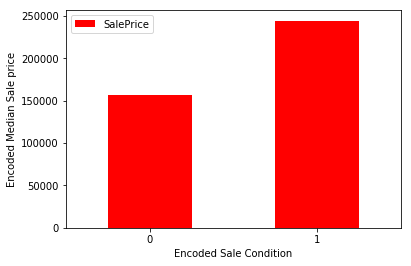

In [21]:
condition_pivot = train.pivot_table(index='enc_condition',values='SalePrice',aggfunc=np.median)
condition_pivot.plot(kind='bar', color='red')
plt.xlabel('Encoded Sale Condition')
plt.ylabel('Encoded Median Sale price')
plt.xticks(rotation=0)
plt.show()

In [22]:
def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # noise term prevents the zero division
    return numerator / (denominator + 1e-7)

In [23]:
data = train.select_dtypes(include=[np.number]).interpolate().dropna()

In [24]:

y = np.log(train.SalePrice)
x = data.drop(['SalePrice','Id'], axis=1)

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42,test_size=.33)


In [26]:

x1_train= MinMaxScaler(x_train)
y1_train= MinMaxScaler(y_train)
x1_test=x_test

In [27]:
lr = linear_model.LinearRegression()

In [28]:
model = lr.fit(x_train, y_train)

In [29]:
print(model.score(x_test, y_test))

0.8647463410578206


In [30]:
predictions = model.predict(x_test)

In [31]:
print("RSME" ,mean_squared_error(y_test, predictions))

RSME 0.023051468191913213


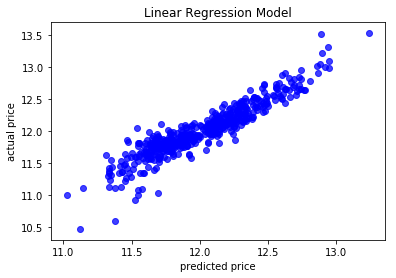

In [32]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.75,color='b')
plt.xlabel("predicted price")
plt.ylabel('actual price')
plt.title('Linear Regression Model')
plt.show()

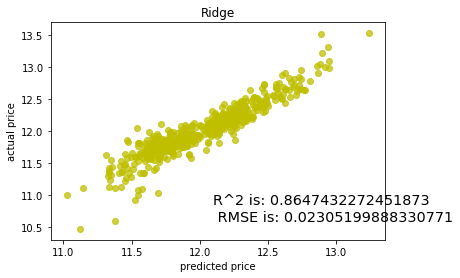

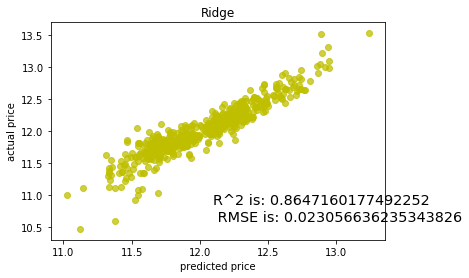

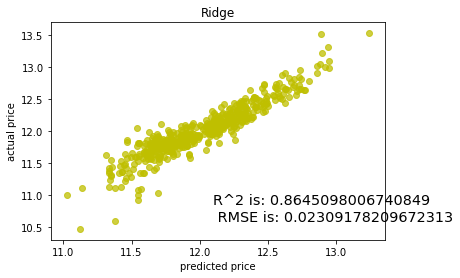

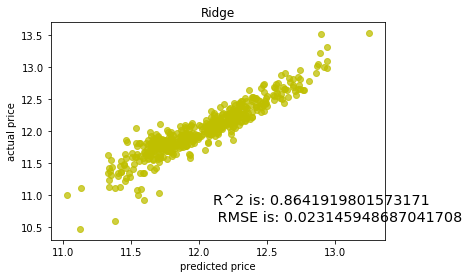

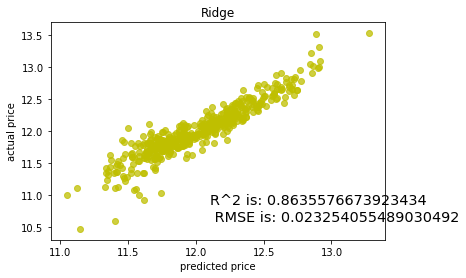

In [33]:
for i in range(-2, 3):
    alpha = 10**i
    rm = linear_model.Ridge(alpha=alpha)
    ridge_model = rm.fit(x_train, y_train)
    preds_ridge = ridge_model.predict(x_test)
    
    plt.scatter(preds_ridge, actual_values, alpha=0.75,color='y')
    plt.xlabel("predicted price")
    plt.ylabel('actual price')
    plt.title('Ridge'.format(alpha))
    overlay='R^2 is: {}\n RMSE is: {}'.format(ridge_model.score(x_test, y_test),mean_squared_error(y_test,preds_ridge))
    plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
    plt.show()

In [34]:
X = tf.placeholder(tf.float32, shape=None)
Y = tf.placeholder(tf.float32, shape=None)
w = tf.Variable(tf.random_normal([38,1]), name='weight')
b = tf.Variable(tf.random_normal([1]),name='bias')


In [35]:
hypothesis = tf.matmul(X,w) +b

In [36]:
cost = tf.reduce_mean(tf.square(hypothesis - Y))



In [37]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.0001)

In [38]:
train = optimizer.minimize(cost)

In [39]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())


KeyboardInterrupt: 

In [ ]:

for step in range(100001):
    cost_, hypo_, _ = sess.run([cost, hypothesis, train], feed_dict={X:x1_train, Y:y1_train})
    if step%500 ==0:
        print("#",step, "cost", cost_)
        print("--")
        

     

In [ ]:
n_inputs = x_test.shape[0]

for i in range(n_inputs):
    dict = sess.run(hypothesis, feed_dict={X:x_test})
    print(dict[i])
    


In [ ]:
import xgboost as xgb

In [56]:
dtrain = xgb.DMatrix(x1_train, label = y)
dtest = xgb.DMatrix(x_test)

In [57]:
params = {"max_depth":2,"eta":0.1}


In [58]:
model = xgb.cv(params, dtrain, num_boost_round=500, early_stopping_rounds=100)

[16:42:44] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[16:42:44] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[16:42:44] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[16:42:44] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[16:42:44] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[16:42:44] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[16:42:44] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 

[16:42:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:42:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:42:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:42:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:42:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[16:42:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[16:42:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 

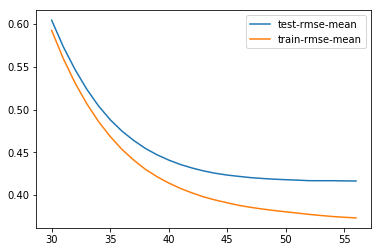

In [59]:
model.loc[30:,["test-rmse-mean","train-rmse-mean"]].plot()

In [78]:
model_xgb = xgb.XGBRegressor(n_estimators=360,max_depth=2,learning_rate=0.0001)
model_xgb.fit(x1_train,y1_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.0001, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=360,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [79]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score


In [82]:


model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(x1_train, y1_train)
xgb_preds = np.expm1(model_xgb.predict(x_test))
lasso_preds = np.expm1(model_lasso.predict(x_test))

C:\Users\josep\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in expm1
  """


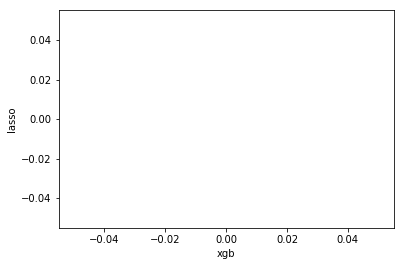

In [83]:
predictions = pd.DataFrame({"xgb":xgb_preds, "lasso":lasso_preds})
predictions.plot(x = "xgb", y = "lasso", kind = "scatter")

In [44]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(x_test)
kmeans.labels_

array([0, 4, 0, 2, 4, 2, 4, 2, 2, 4, 2, 0, 4, 0, 0, 0, 0, 0, 0, 0, 4, 0,
       0, 2, 0, 0, 0, 4, 0, 2, 0, 0, 4, 0, 4, 0, 0, 0, 4, 4, 2, 0, 0, 4,
       0, 0, 0, 0, 4, 4, 0, 0, 2, 4, 2, 4, 0, 4, 0, 0, 2, 0, 0, 4, 4, 4,
       0, 4, 0, 2, 0, 0, 0, 0, 4, 2, 0, 0, 0, 0, 2, 0, 1, 2, 0, 2, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 4, 4, 0, 4, 2, 4, 0, 0, 2, 0, 4,
       2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 4, 4, 4, 0, 0, 0, 0, 0, 4,
       0, 2, 0, 4, 0, 0, 0, 1, 4, 4, 0, 0, 1, 0, 4, 4, 0, 0, 4, 0, 1, 4,
       0, 0, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 2, 2, 2, 0, 4,
       0, 4, 0, 2, 0, 0, 0, 2, 4, 0, 4, 2, 0, 2, 2, 2, 0, 0, 2, 0, 2, 0,
       2, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 2, 1, 0, 2, 0, 0, 0,
       4, 2, 4, 2, 0, 4, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 4, 0, 0, 4,
       0, 4, 0, 0, 0, 4, 2, 2, 1, 0, 0, 2, 4, 2, 2, 2, 0, 0, 4, 4, 0, 4,
       0, 4, 2, 2, 0, 0, 4, 2, 0, 2, 0, 0, 2, 0, 1, 0, 4, 2, 0, 0, 0, 0,
       4, 2, 4, 0, 0, 0, 0, 0, 0, 0, 2, 0, 4, 2, 4,

Text(0.5,0,'PC2')

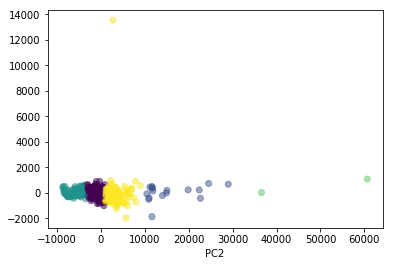

In [46]:
from sklearn.decomposition import PCA
pca_cov = PCA(n_components=3)

X_reduced = pca_cov.fit_transform(x_test)
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=kmeans.labels_, alpha=0.5)
plt.xlabel('PC1')
plt.xlabel('PC2')